# Computational Mathematics  <a class="tocSkip">

## Errors, verification & validation <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---$\ell^p$-norms" data-toc-modified-id="Homework---$\ell^p$-norms-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - $\ell^p$ norms</a></span></li><li><span><a href="#Homework---norms-in-linear-best-fit-[*]" data-toc-modified-id="Homework---norms-in-linear-best-fit-[*]-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - norms in linear best fit [*]</a></span></li><li><span><a href="#Homework---SymPy-and-the-logistic-ODE" data-toc-modified-id="Homework---SymPy-and-the-logistic-ODE-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - SymPy and the logistic ODE</a></span></li><li><span><a href="#Homework---round-off-vs-truncation-errors" data-toc-modified-id="Homework---round-off-vs-truncation-errors-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - round-off vs truncation errors</a></span></li><li><span><a href="#Homework---Vandermonde-matrices-[*]" data-toc-modified-id="Homework---Vandermonde-matrices-[*]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Vandermonde matrices [*]</a></span></li><li><span><a href="#Homework---ill-conditioned-matrices-and-the-solution-of-corresponding-linear-systems-[*]" data-toc-modified-id="Homework---ill-conditioned-matrices-and-the-solution-of-corresponding-linear-systems-[*]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - ill-conditioned matrices and the solution of corresponding linear systems [*]</a></span></li><li><span><a href="#Homework---Hilbert-matrix-[*]" data-toc-modified-id="Homework---Hilbert-matrix-[*]-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Hilbert matrix [*]</a></span></li></ul></li></ul></div>

In [2]:
%matplotlib inline
%precision 16
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl

# Homework

## Homework - $\ell^p$ norms

See <https://en.wikipedia.org/wiki/Sequence_space#%E2%84%93p_spaces>

Recall our vector norms from lecture

\begin{align*}
\|\boldsymbol{v}\,\|_2 & = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2} = \left(\sum_{i=1}^n v_i^2 \right)^{1/2}, &&{\text{the two-norm}}\\[5pt]
\|\boldsymbol{v}\,\|_1  & = |v_1| + |v_2| + \ldots + |v_n| = \sum_{i=1}^n |v_i|, &&{\text{the one-norm}}\\[5pt]
\|\boldsymbol{v}\,\|_{\infty}  &= \max\{|v_1|,|v_2|, \ldots, |v_n| = \max_{i=1}^n |v_i|, &&{\text{the max-norm}}
\end{align*}

we can generalise the "two-norm" to the "$p$-norm":

$$\|\boldsymbol{v}\,\|_p = \left(v_1^2 + v_2^2 + \ldots + v_n^2\right)^{1/p} 
= \left(\sum_{i=1}^n v_i^p \right)^{1/p}$$

Plot the unit circle in terms of this norm - what shapes does it recreate for $p=1$ and $p$ very large?

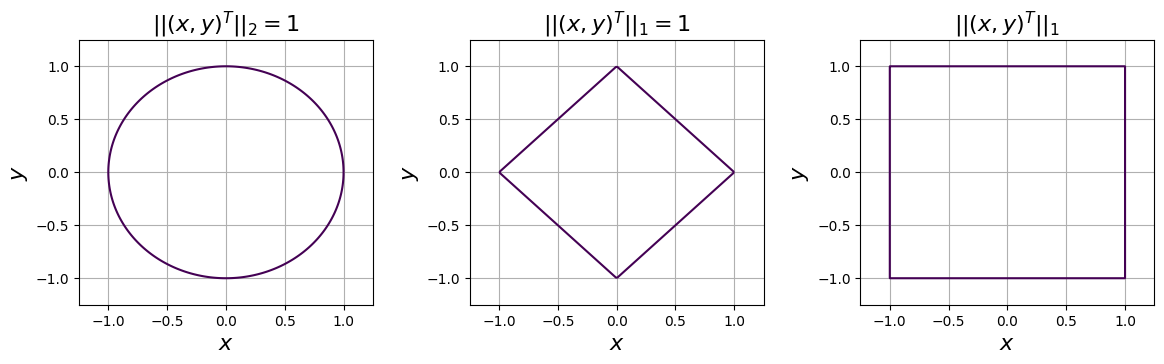

In [10]:

x = np.linspace(-1.25,1.25,200)
y = x
[X,Y] = np.meshgrid(x,y)
two_norm = np.zeros_like(X)
one_norm = np.zeros_like(X)
inf_norm = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        op = np.array([x[i],y[j]])
        two_norm[i,j] = sl.norm(op,2)
        one_norm[i,j] = sl.norm(op,1)
        inf_norm[i,j] = sl.norm(op,np.inf)

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
ax1.contour(X,Y,two_norm, levels=[1])
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('$|| (x,y)^T ||_{2} = 1$', fontsize=16)
ax1.grid(True)

ax2 = fig.add_subplot(132)
ax2.contour(X,Y,one_norm, levels=[1])
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('$|| (x,y)^T ||_{1} = 1$', fontsize=16)
ax2.grid(True)

ax3 = fig.add_subplot(133)
ax3.contour(X,Y,inf_norm, levels = [1])
ax3.set_xlabel('$x$',fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('$|| (x,y)^T ||_{1}$', fontsize=16)
ax3.grid(True)
plt.tight_layout(pad=2.0)


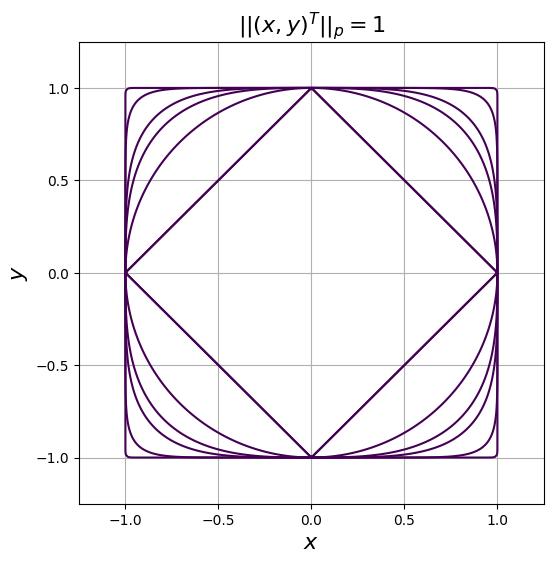

In [12]:
x = np.linspace(-1.25,1.25,200)
y = x

[X,Y] = np.meshgrid(x,y)
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

def p_norm_fun(x,p=2):
    return (np.sum(np.abs(x)**p)) ** (1/p)

for p in [1,1,2,3,4,10,100]:
    p_norm = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            op = np.array([x[i], y[j]])
            p_norm[i,j] = p_norm_fun(op,p)
    ax1.contour(X,Y,p_norm,levels=[1])

ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('$|| (x,y)^T ||_{p} = 1$', fontsize=16)
ax1.grid(True)

## Homework - norms in linear best fit [*]

Try updating the example from class so that the linear best fit line goes through the origin, i.e. you are optimising for the slope parameter only with each line going through the origin (the intercept is zero).


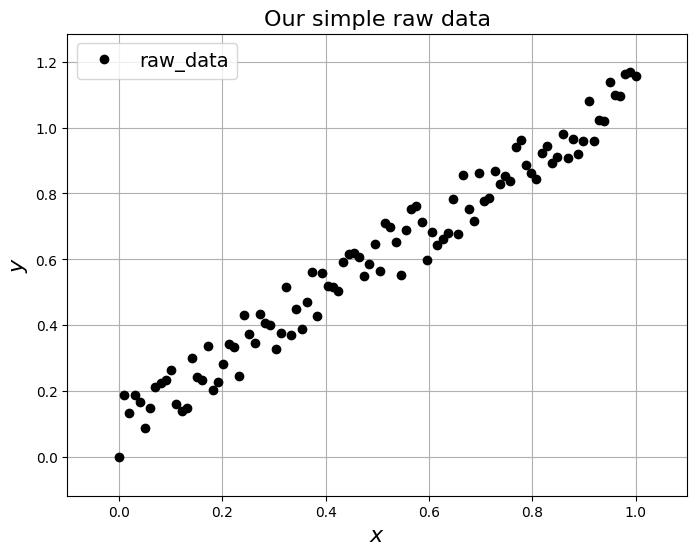

In [17]:
xi = np.linspace(0,1,100)
yi = xi + 0.2 * np.random.random((100))

def plot_raw_data(xi,yi,ax):
    ax.plot(xi,yi,'ko', label='raw_data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
plot_raw_data(xi,yi,ax1)
ax1.set_title('Our simple raw data', fontsize=16)
ax1.legend(loc='best', fontsize=14)


poly_coeffs:  [1.0058577315178874 0.1014554604110973]


Text(0.5, 1.0, 'Raw data and the corresponding linear best fit line')

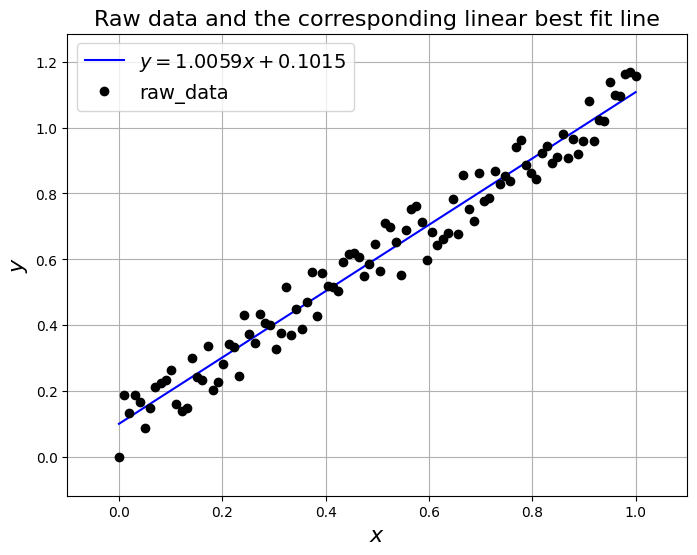

In [18]:
degree = 1
poly_coeffs = np.polyfit(xi,yi,degree)
print('poly_coeffs: ', poly_coeffs)

p1 = np.poly1d(poly_coeffs)
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
x = np.linspace(0,1,100)
ax1.plot(x,p1(x),'b',label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))

plot_raw_data(xi,yi,ax1)
ax1.legend(loc='best', fontsize=14)
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=16)


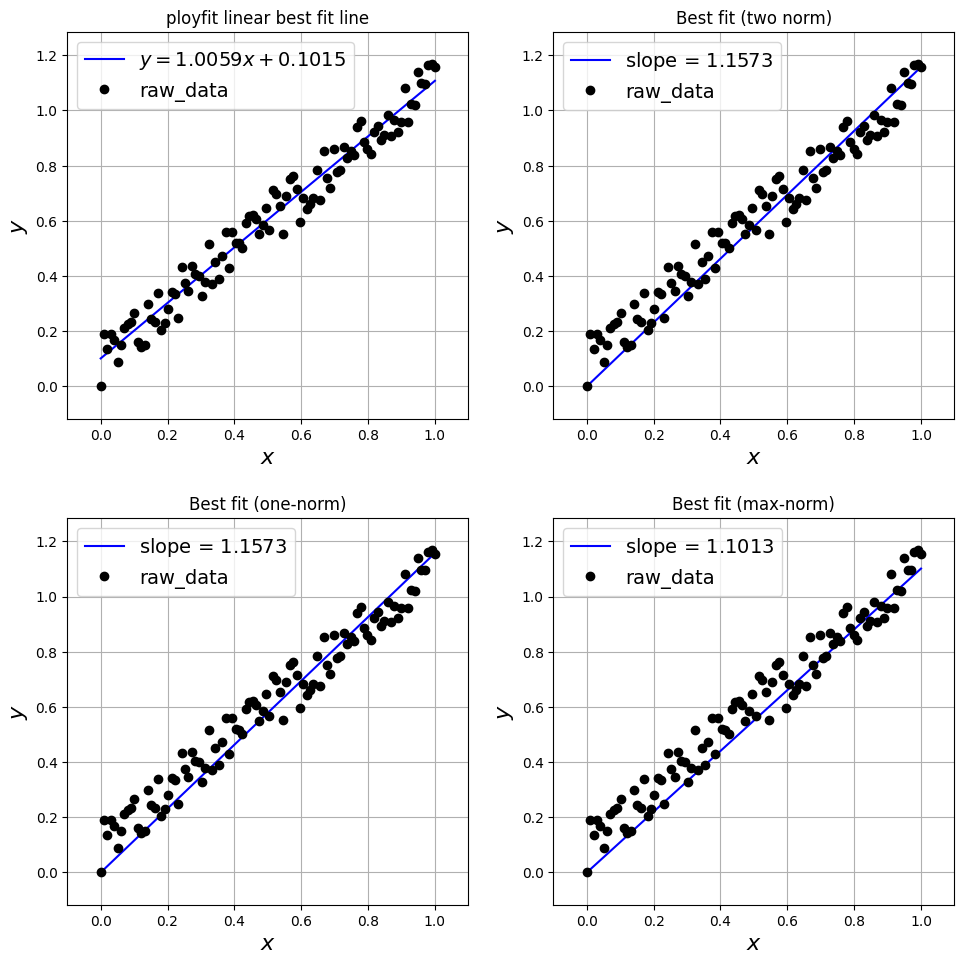

In [23]:

from scipy.optimize import minimize

def line_fit(x,line_slope):
    return line_slope*x +0.

def cost_fun(line_slope, x,y,norm):
    if norm == 'two':
        return sl.norm(y - line_fit(x,line_slope),2)
    elif norm == 'one':
        return sl.norm(y - line_fit(x,line_slope),2)
    elif norm == 'max':
        return sl.norm(y - line_fit(x,line_slope),np.inf)
    else:
        raise ValueError('Check your norm string')

degree = 1
poly_coeffs = np.polyfit(xi,yi,degree)
p1 = np.poly1d(poly_coeffs)
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0,1,100)
ax.plot(x,p1(x), 'b', label=r'$y = {0:.4f}x + {1:.4f}$'.format(poly_coeffs[0],poly_coeffs[1]))
plot_raw_data(xi,yi,ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('ployfit linear best fit line', fontsize=12)

x0 = poly_coeffs[0]
output = minimize(cost_fun,x0,args=(xi,yi,'two'))
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0,1,100)
ax.plot(x,output.x * x, 'b', label=r'slope = ${0:.4f}$'.format(output.x[0]))
plot_raw_data(xi,yi,ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two norm)', fontsize=12)

x0 = poly_coeffs[0]
output = minimize(cost_fun,x0,args=(xi,yi,'one'))
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0,1,100)
ax.plot(x,output.x *x, 'b', label=r'slope = ${0:.4f}$'.format(output.x[0]))
plot_raw_data(xi,yi,ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

x0 = poly_coeffs[0]
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0,1,100)
ax.plot(x,output.x * x, 'b', label=r'slope = ${0:.4f}$'.format(output.x[0]))
plot_raw_data(xi,yi,ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)

plt.tight_layout(pad=2)

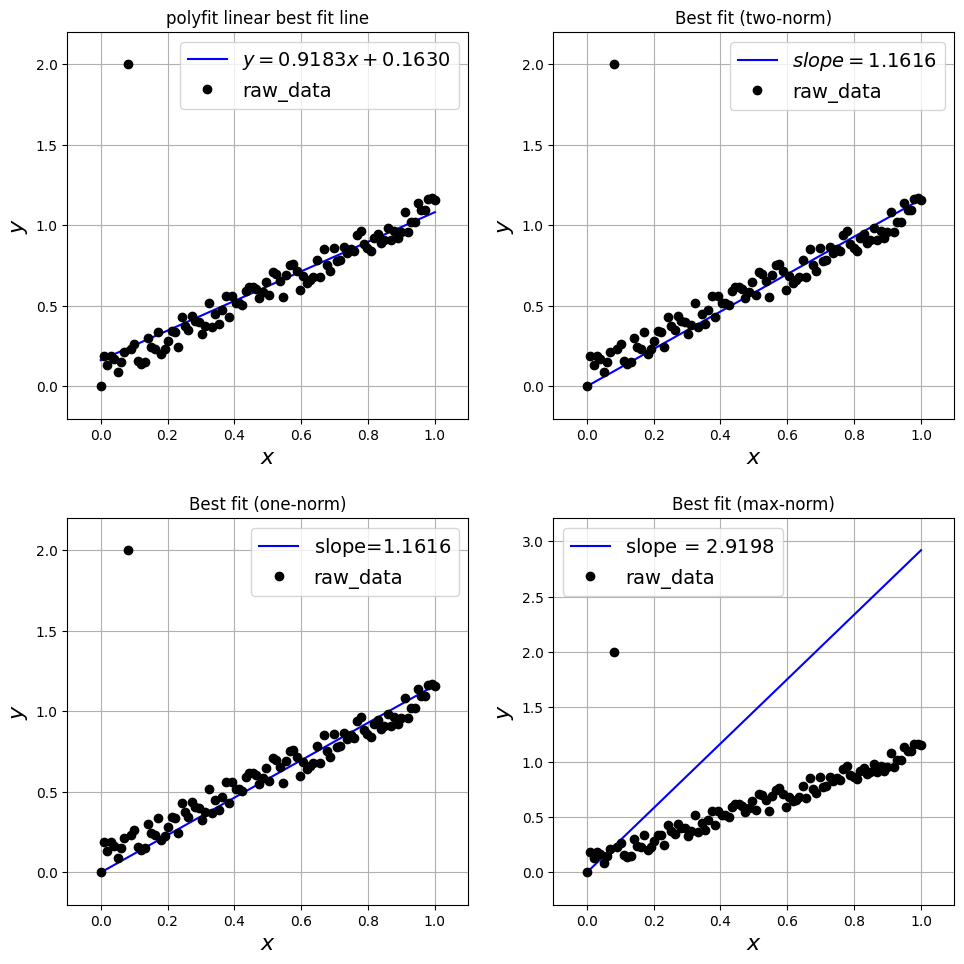

In [27]:
yi[8] = 2.

degree = 1
poly_coeffs = np.polyfit(xi,yi,degree)
p1 = np.poly1d(poly_coeffs)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0,1,100)
ax.plot(x,p1(x), 'b', label=r'$y={0:.4f}x+{1:.4f}$'.format(poly_coeffs[0],poly_coeffs[1]))
plot_raw_data(xi,yi,ax)
ax.legend(loc='best',fontsize=14)
ax.set_title('polyfit linear best fit line', fontsize=12)

x0 = poly_coeffs[0]
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0,1,100)
ax.plot(x,output.x*x, 'b', label=r'$slope={0:.4f}$'.format(output.x[0]))
plot_raw_data(xi,yi,ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

x0 = poly_coeffs[0]
output = minimize(cost_fun,x0,args=(xi,yi,'one'))
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0,1,100)
ax.plot(x,output.x*x, 'b', label=r'slope=${0:.4f}$'.format(output.x[0]))
plot_raw_data(xi,yi,ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

x0 = poly_coeffs[0]
output = minimize(cost_fun,x0,args=(xi,yi,'max'))
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0,1,100)
ax.plot(x,output.x*x, 'b', label=r'slope = ${0:.4f}$'.format(output.x[0]))
plot_raw_data(xi,yi,ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)

plt.tight_layout(pad=2)

## Homework - SymPy and the logistic ODE


In lecture 1 we considered the logistic ODE

$$\frac{dx}{dt} = \alpha x(1-x), \qquad x(0)=x_0$$

and derived the following solution

$$x(t) = \frac{x_0}{x_0 + (1-x_0)e^{-\alpha t}}$$

Use SymPy to derive the same solution symbolically

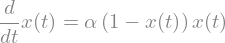

In [28]:
import sympy as sym

sym.init_printing()
t, alpha, x0 = sym.symbols('t, alpha, x0')
x = sym.Function('x')
dxdt = x(t).diff(t)
logistic_expr = sym.Eq(dxdt, alpha*x(t)*(1-x(t)))
logistic_expr

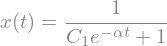

In [29]:
logistic_col = sym.dsolve(logistic_expr,x(t))
logistic_col

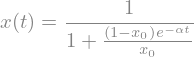

In [30]:
logistic_sol = sym.dsolve(logistic_expr,x(t),ics={x(0):x0})
logistic_sol

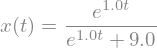

In [31]:
logistic_sol_ic = sym.simplify(logistic_sol.subs({x0:0.1, alpha:1.0}))
logistic_sol_ic

In [32]:
logistic_sol_fun = sym.lambdify(t,logistic_sol_ic.rhs)
print(logistic_sol_fun(1))

0.23196931668407395


In [33]:
def x_ex(t,x0,alpha):
    return x0/(x0 + (1-x0)*np.exp(-alpha*t))
print(x_ex(1,0.1,1))

0.23196931668407392


## Homework - round-off vs truncation errors

Given a function $f(x)$, a Taylor series analysis tells us that the following is a first-order approximation to its derivative:

$$f'(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

Of course this is just the finite version of the mathematics you used to first learn about what a derivative is:

$$f'(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

Code up this approximation and plot the error as a function of $\Delta x$, and see what happens as we vary $\Delta x$ from very large to very small values (make sure you don't go to extreme with these as you might experience overflow!)

You could test with the function $f(x) = \exp(x)$ at $x=1$ say, but other examples should show similar results.

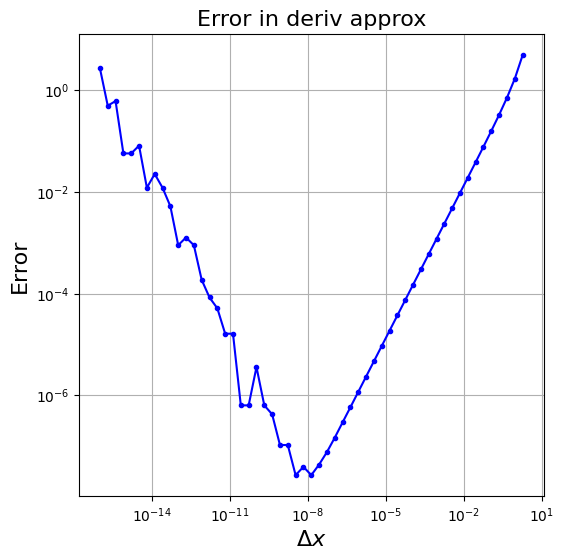

In [35]:
dx = np.array([1e-16 * 2**n for n in range(55)])
x = 1*np.ones_like(dx)
dfdx = (np.exp(x+dx) - np.exp(x)) / dx
error = np.abs( dfdx - np.exp(x)*np.ones_like(dx))
#print(error)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.loglog(dx,error,'b.-')
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Error in deriv approx', fontsize=16)
ax1.grid(True)


## Homework - Vandermonde matrices [*]

We will see in a later lecture how polynomial interpolation using a monomial basis involves the solution of a linear system with a so-called [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

A potential issue is that Vandermonde matrices are known to be ill-conditioned.

Assume that we are dealing with a square matrix, write some code to construct the Vandermonde matrix given a vector of $\alpha$ values. You can check your code against `np.vander`.

Investigate how the condition number of the matrix varies for a uniform mesh of data points in $x$ (i.e. `alpha = np.linspace(0, 1, n)` as a function of the number of points in the mesh (`n`).


3 15.099657722502098
4 98.86773850722767
5 686.4349418186005
6 4924.371056611069
7 36061.16088021424
8 267816.7009078438
9 2009396.380029776
10 15193229.676425043
11 115575244.52221444
12 883478687.0422435


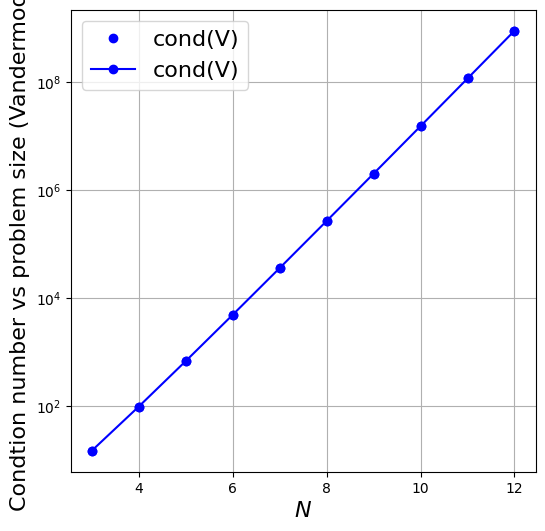

In [36]:


def vdm_row(alpha,n):
    row = np.zeros(n)
    cur_alpha = 1
    for i in range(n):
        row[i] = cur_alpha
        cur_alpha *= alpha
    return row

def vdm(alpha_vec):
    n = alpha_vec.size
    A = np.zeros((n,n))
    for i in range(n):
        A[i,:] = vdm_row(alpha_vec[i],n)
    return A

x = np.linspace(0,1,100)
nns = 10
ns = np.linspace(3,3+nns-1,nns,dtype=int)
condV = np.zeros(len(ns))
for i, n in enumerate(ns):
    x = np.linspace(0,1,n)
    V = vdm(x)
    condV[i] = np.linalg.cond(V)
    print(n,condV[i])

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

ax1.semilogy(ns,condV,'bo',label='cond(V)')
ax1.semilogy(ns,condV,'bo-',label='cond(V)')
ax1.set_xlabel('$N$', fontsize=16)
ax1.set_ylabel('Condtion number vs problem size (Vandermode)', fontsize=16)
ax1.legend(loc='best', fontsize=16)
ax1.grid(True)    

## Homework - ill-conditioned matrices and the solution of corresponding linear systems [*]

Consider the problem from the lecture

$$
\left(
  \begin{array}{cc}
    2 & 1 \\
    2 & 1 + \epsilon  \\
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y \\
  \end{array}
\right) = \left(
  \begin{array}{c}
    3 \\
    0 \\
  \end{array}
\right)
$$

and let's consider the case where $\epsilon = 0.1$.

Consider the two extreme points we computed from class that corresponded to the magenta and black dots in our plots

```Python
A = np.array([[2.,1.],[2.,1. + 0.1]])

# these are the points we computed from class
origin_p = np.array([2.235621,2.282122])
origin_p2 = np.array([-0.044721,0.04381])
```

construct a small (I used a perturbation size of magnitude 0.01) circle of points around each of these - consider these as perturbed RHS $\boldsymbol{b}$ values. 

Compute and plot the corresponding shape you get for the set of perturbed solutions $\boldsymbol{x}$.

Compute the maximum value of the ratio of the relative perturbation in $x$ to the relative perturbation in $b$:

$$\frac{  {\|\delta \boldsymbol{x}\|} / {\|\boldsymbol{x}\|}   }{  {\|\delta \boldsymbol{b}\|} / {\|\boldsymbol{b}\|}    } $$

for each case and convince yourself that for both this quantity is bounded by the condition number as the theory implies.

1.0000067973524451 51.03034644405499
4.999967930484449 255.14836136844528
51.0304038391865


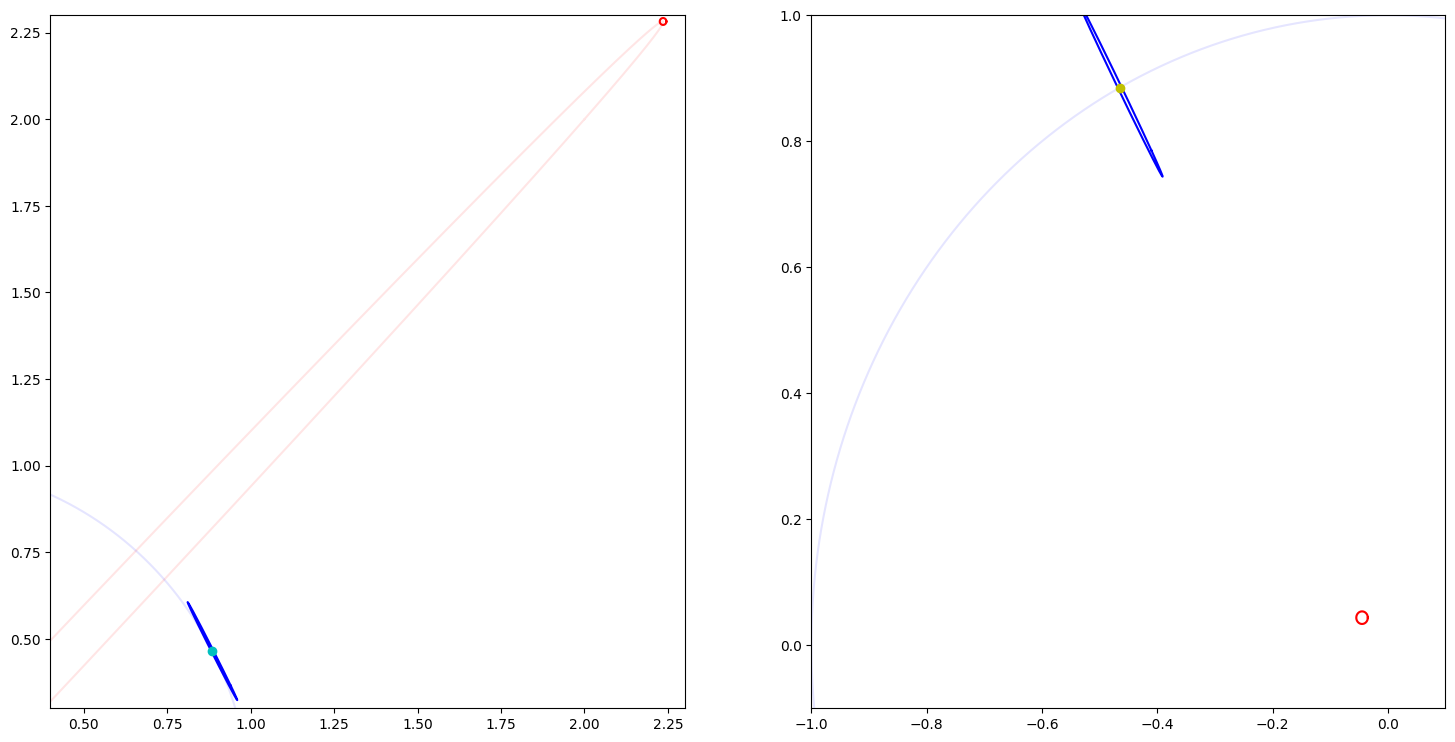

In [41]:
from numpy import zeros


A = np.array([[2,1],[2,1+0.1]])
origin_p = np.array([2.235621, 2.282122])
origin_p2 = np.array([-0.044721, 0.04381])

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(121)
theta = np.linspace(0,2*np.pi,1000)
np.append(theta,0)
r = 0.01
points = np.vstack((r*np.cos(theta) + origin_p[0], r*np.sin(theta) + origin_p[1]))
circle = np.vstack((np.cos(theta), np.sin(theta) ))
ax1.plot(circle[0,:], circle[1,:], 'b', alpha=0.1)
circle_ = A@circle
ax1.plot(circle_[0,:], circle_[1,:],'r', alpha=0.1)
ax1.plot(points[0,:],points[1,:], 'r')
pointsp = sl.inv(A)@points

ax1.plot(pointsp[0,:], pointsp[1,:], 'b')
origin_x = sl.inv(A)@origin_p
ax1.plot(origin_x[0], origin_x[1], 'co', lw=4, zorder=30)

rel_x_over_rel_b = np.zeros(np.shape(pointsp)[1])
for i in range(np.shape(pointsp)[1]):
    rel_x_over_rel_b[i] = ( (sl.norm(pointsp[:,i] - origin_x, 2)/ sl.norm(origin_x,2))/
                             (sl.norm(points[:,i] - origin_p, 2)/ sl.norm(origin_p,2)) )
print(np.min(rel_x_over_rel_b), np.max(rel_x_over_rel_b))

ax2 = fig.add_subplot(122)
theta = np.linspace(0,2*np.pi, 1000)
np.append(theta,0)
r = 0.01
points = np.vstack((r*np.cos(theta)+ origin_p2[0], r*np.sin(theta) + origin_p2[1]))

circle = np.vstack((np.cos(theta), np.sin(theta)))
ax2.plot(circle[0,:],circle[1,:],'b',alpha=0.1)
circle_ = A@circle
ax2.plot(points[0,:], points[1,:],'r', alpha=0.1)

ax2.plot(points[0,:], points[1,:], 'r')
pointsp = sl.inv(A)@points

ax2.plot(pointsp[0,:], pointsp[1,:],'b')
origin_x2 = sl.inv(A)@origin_p2
ax2.plot(origin_x2[0], origin_x2[1], 'yo', lw=4, zorder=30)

ax2.set_xlim(-1,0.1)
ax2.set_ylim(-0.1,1)

rel_x_over_rel_b = np.zeros(np.shape(pointsp)[1])
for i in range(np.shape(pointsp)[1]):
    rel_x_over_rel_b[i] = (( sl.norm(pointsp[:,i] - origin_x2,2)/ sl.norm(origin_x2,2)/
                             sl.norm(points[:,i]  - origin_p2,2)/ sl.norm(origin_p2,2)))

print(np.min(rel_x_over_rel_b), np.max(rel_x_over_rel_b))
print(np.linalg.cond(A))

ax1.set_xlim(0.4, 2.3)
ax1.set_ylim(0.3,2.3)

## Homework - Hilbert matrix [*]

The *Hilbert matrix* is a classic example of ill-conditioned (square) matrix:

$$
A = 
  \begin{pmatrix}
    1      & 1/2    & 1/3    & \cdots \\
    1/2    & 1/3    & 1/4    & \cdots \\
    1/3    & 1/4    & 1/5    & \cdots \\
    \vdots & \vdots & \vdots & \ddots  \\
\end{pmatrix}\,.
$$

Let's consider the linear system $A\boldsymbol{x}=\boldsymbol{b}$ where the RHS vector is defined as

$$ b_i = \sum_{j=1}^n a_{ij},\;\;\; \text{for}\;\;\;\; i=1,2,\ldots, n.$$


- Think about how you can write entry $a_{ij}$ for any $i$ and $j$ mathematically, and use this to write a function that generated the Hilbert matrix for a given $n$.


- Convince yourself that $ \boldsymbol{x} = \left[ 1, 1, \cdots 1\right]^T$ is the exact solution of the system.


- Write a function that returns $A$ and $b$ for a given $n$.


- For a range of $n$, compute the condition number of $A$, solve the linear system and compute the error between the NumPy/SciPy solution you obtain and the exact solution.  How does the error vary with $n$?

<br>

**Notes**

For this example we do not need to introduce any explicit perturbations in our problem in order to generate errors in our solution.

We can interpret the exact mathematical problem as written down above as the unperturbed case with the unperturbed exact solution being $ \boldsymbol{x} = \left[ 1, 1, \cdots 1\right]^T$.

Floating point errors will mean that every case we consider numerically will be perturbed slightly - both the entries of $A$ and $\boldsymbol{b}$ won't be exactly as they should be. With finite precision arithmetic our calculations can only be as accurate as [*machine epsilon*](https://en.wikipedia.org/wiki/Machine_epsilon) which assuming double precision is given by

```Python
print('machine epsilon = ', np.finfo(float).eps)
machine epsilon =  2.220446049250313e-16
```
The relation 

$$ \text{relative error of output}  \sim  \text{condition number} \times  \text{relative error of input} $$

therefore gives us an upper bound on how accurate we can expect our solution to be:

$$ \text{relative error of output}  \sim  \text{condition number} \times  \text{machine epsilon}. $$

Add this relation to your relative error plot and check it indeed provides an upper bound, which grows with $n$, and that our relative error is close to this value and grows in tandem with it as $n$ increases.

This emphasises the point that for ill-conditioned problems large errors can be expected even if only floating point errors are present.

In [42]:
a = 1/3
print(a)
print('{:.16f}'.format(a))
print('{:.17f}'.format(a))
print('{:.20f}'.format(a))
b = 100000*a - 33333
print(b)
print(3*b)

0.3333333333333333
0.3333333333333333
0.33333333333333331
0.33333333333333331483
0.3333333333284827
0.9999999999854481


machine epsilon =  2.220446049250313e-16


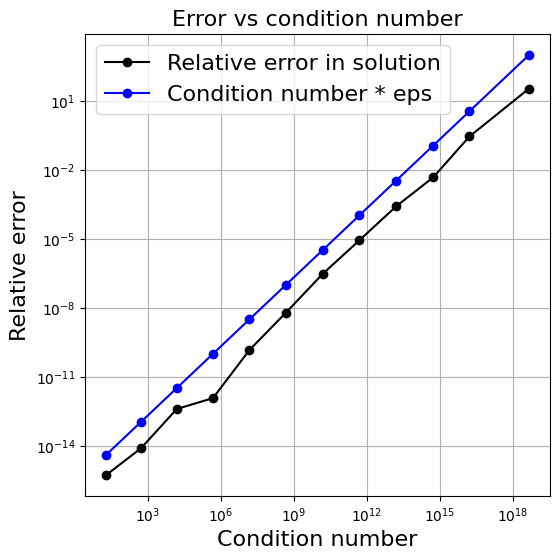

In [47]:
def hilbert(n):
    A = np.zeros((n,n))
    b = np.zeros(n)
    for i in range(n):
        for j in range(n):
            A[i,j] = 1./(i+j+1)
        b[i] = np.sum(A[i,:])#
    return A,b
n_max = 14
ns = range(2,n_max)
conds = np.zeros_like(ns,dtype=float)
errors = np.zeros_like(ns, dtype=float)
for i,n in enumerate(ns):
    A,b = hilbert(n)
    x = np.linalg.solve(A,b)
    x_exact = np.ones(n)
    errors[i] = sl.norm(x-x_exact,2) / sl.norm(x_exact,2)
    conds[i] = np.linalg.cond(A)
print('machine epsilon = ', np.finfo(float).eps) 

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

ax1.loglog(conds, errors,'ko-',label='Relative error in solution')
ax1.loglog(conds, conds*np.finfo(float).eps, 'bo-', label = 'Condition number * eps')
ax1.set_xlabel('Condition number', fontsize=16)
ax1.set_ylabel('Relative error', fontsize=16)
ax1.set_title('Error vs condition number', fontsize=16)
ax1.legend(loc='best', fontsize=16)
ax1.grid(True)       